<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Bezier_Curves_to_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is an example of applying the geometric tool known as a Bezier curve to band diagrams used in Solid State Physics

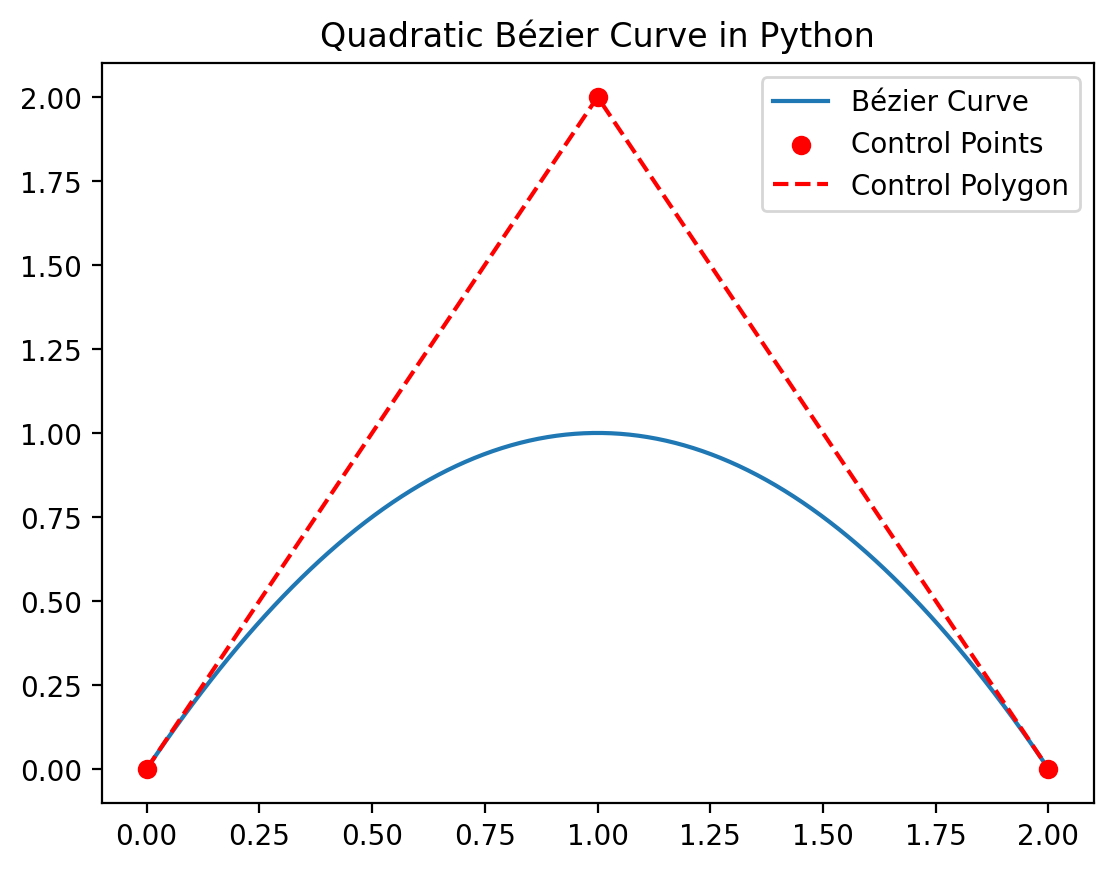

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# Quadratic Bézier curve function
def bezier_curve(t, P0, P1, P2):
    return (1 - t)**2 * P0 + 2 * (1 - t) * t * P1 + t**2 * P2

# Control points
P0 = np.array([0, 0])
P1 = np.array([1, 2])
P2 = np.array([2, 0])

# Generate curve points
t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(t, P0, P1, P2) for t in t_values])

# Plot the curve
plt.plot(curve_points[:, 0], curve_points[:, 1], label="Bézier Curve")
plt.scatter(*zip(P0, P1, P2), color='red', label="Control Points", zorder=3)
plt.plot([P0[0], P1[0], P2[0]], [P0[1], P1[1], P2[1]], 'r--', label="Control Polygon")

plt.legend()
plt.title("Quadratic Bézier Curve in Python")
plt.show()

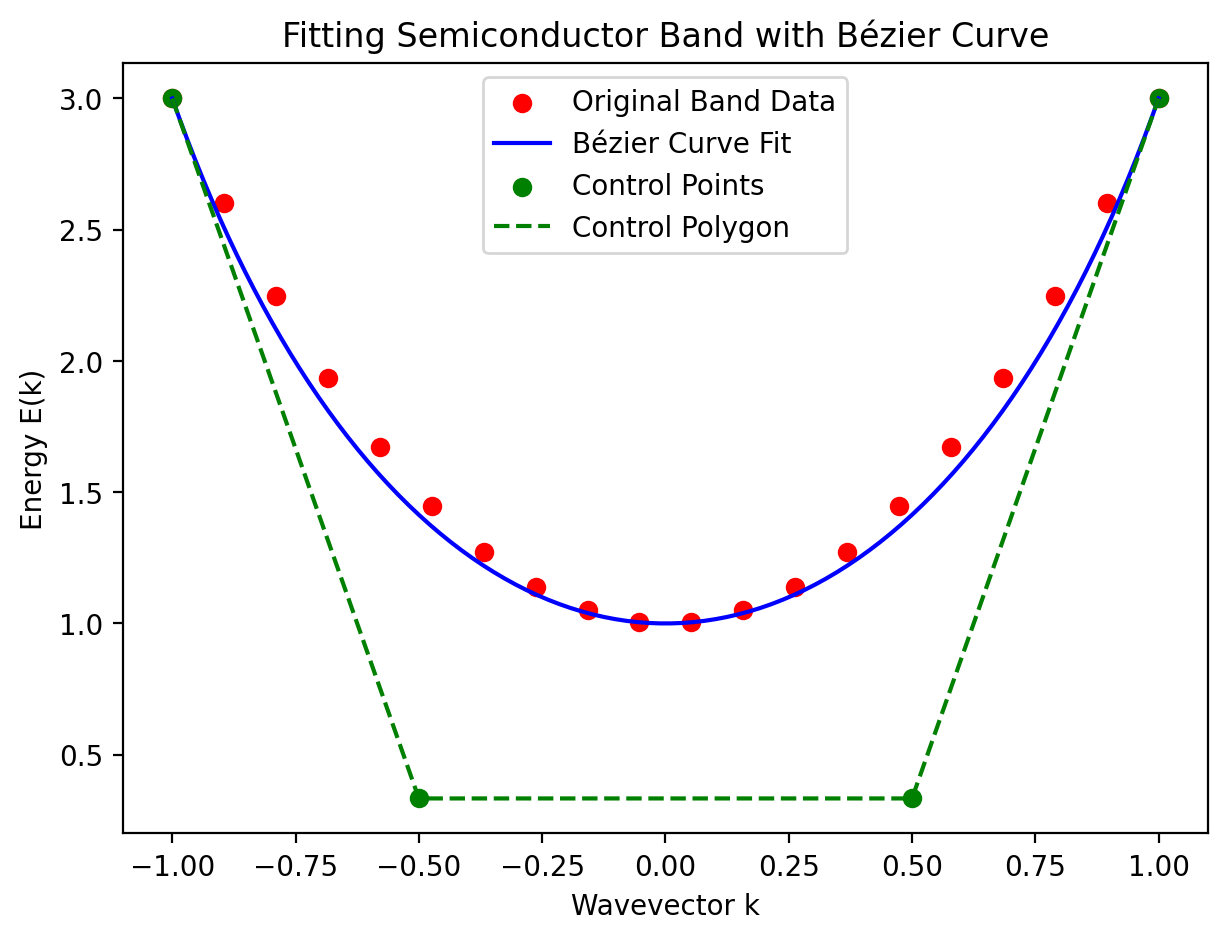

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Bézier curve function (Cubic)
def bezier_curve(t, P0, P1, P2, P3):
    return ((1 - t) ** 3) * P0 + 3 * ((1 - t) ** 2) * t * P1 + 3 * (1 - t) * (t ** 2) * P2 + (t ** 3) * P3

# Generate synthetic semiconductor conduction band data (parabolic)
k_vals = np.linspace(-1, 1, 20)  # k-space values (normalized)
E_vals = 1 + 2 * k_vals**2  # Example conduction band energy E(k)

# Define fixed endpoints for Bézier curve (must pass through first and last point)
P0 = np.array([k_vals[0], E_vals[0]])
P3 = np.array([k_vals[-1], E_vals[-1]])

# Initial guess for control points (P1, P2) - manually set initially
P1 = np.array([k_vals[0] + 0.5, E_vals[0] + 1])
P2 = np.array([k_vals[-1] - 0.5, E_vals[-1] + 1])

# Function to optimize control points P1 and P2
def loss_function(params):
    P1_guess = np.array([params[0], params[1]])
    P2_guess = np.array([params[2], params[3]])

    # Compute Bézier points
    t_vals = np.linspace(0, 1, len(k_vals))
    bezier_points = np.array([bezier_curve(t, P0, P1_guess, P2_guess, P3) for t in t_vals])

    # Loss: Mean squared error between Bézier curve and conduction band
    return np.mean((bezier_points[:, 1] - E_vals) ** 2)

# Optimize P1 and P2 to minimize the error
result = minimize(loss_function, [P1[0], P1[1], P2[0], P2[1]], method='Powell')
P1_opt = np.array([result.x[0], result.x[1]])
P2_opt = np.array([result.x[2], result.x[3]])

# Generate Bézier curve using optimized control points
t_vals = np.linspace(0, 1, 100)
bezier_points = np.array([bezier_curve(t, P0, P1_opt, P2_opt, P3) for t in t_vals])

# Plot results
plt.figure(figsize=(7,5))
plt.scatter(k_vals, E_vals, color='red', label="Original Band Data")
plt.plot(bezier_points[:, 0], bezier_points[:, 1], 'b-', label="Bézier Curve Fit")
plt.scatter(*zip(P0, P1_opt, P2_opt, P3), color='green', marker='o', label="Control Points")
plt.plot([P0[0], P1_opt[0], P2_opt[0], P3[0]], [P0[1], P1_opt[1], P2_opt[1], P3[1]], 'g--', label="Control Polygon")

plt.xlabel("Wavevector k")
plt.ylabel("Energy E(k)")
plt.title("Fitting Semiconductor Band with Bézier Curve")
plt.legend()
# plt.grid(True)
plt.show()